# Project 1: SAT and College Admissions Analysis in Michigan

--- 
# Part 1

---

## Problem Statement

Michigan is the largest state where every high schooler in recent years has taken the SAT. At least some of those high schoolers would like to stay in Michigan rather than attending college elsewhere. This project aims to advise students in Michigan who wish to stay in-state whether they should try harder than the average Michigander to do well on the SAT.

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

Michigan is one of twenty states which administer the SAT to high school juniors for free ([*source*](https://blog.prepscholar.com/which-states-require-the-sat)). It is one of three states, the other two being Connecticut and Delaware, which had a 100% SAT participation rate during 2017, 2018, and 2019. Of the three, Michigan is the largest by population ([*source*](https://worldpopulationreview.com/states)) and also has the most universities with 85 ([*source*](https://www.worldatlas.com/articles/which-state-has-the-most-colleges.html)). State law requires SAT scores to be put on student transcripts since it is part of the Michigan Merit Exam ([*source*](https://detroit.chalkbeat.org/2021/6/25/22549509/michigan-sat-university-college)). While many Michigan colleges have decided on test-optional application requirements, college counselors in the state have said that "students are better off taking the SAT or the ACT, if they can" ([*source*](https://www.bridgemi.com/talent-education/will-coronavirus-curb-act-and-sat-admissions-tests-michigan-colleges)).

### Choose your Data

* [`colleges.csv`](../data/colleges.csv): Tracking Covid-19 at U.S. Colleges and Universities ([*source*](https://github.com/nytimes/covid-19-data/blob/master/colleges/colleges.csv))
* [`sat_2017.csv`](../data/sat_2017.csv): 2017 SAT Scores by State ([*source*](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2018.csv`](../data/sat_2018.csv): 2018 SAT Scores by State ([*source*](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/))
* [`sat_2019.csv`](../data/sat_2019.csv): 2019 SAT Scores by State ([*source*](https://blog.prepscholar.com/average-sat-scores-by-state-most-recent))
* [`sat_act_by_college.csv`](../data/sat_act_by_college.csv): Ranges of Accepted ACT & SAT Student Scores by Colleges ([*source*](https://www.compassprep.com/college-profiles/))

### Outside Research

In order to group the colleges in the SAT accepted scores dataset by state so I could focus on only Michigan colleges, I used a dataset from the New York Times which details COVID-19 cases in colleges organized by state [*linked here*](https://github.com/nytimes/covid-19-data/blob/master/colleges/colleges.csv).

### Coding Challenges

1. Manually calculate mean:

In [14]:
def mean(li):
    return sum(num for num in li)/len(li)

2. Manually calculate standard deviation:

In [15]:
def sd(li):
    mn = mean(li)
    
    return (sum((num - mn)**2 for num in li)/len(li))**0.5

3. Data cleaning function:

In [16]:
def pct(string):
    return float(string[:-1])*0.01

--- 
# Part 2

---

*All libraries used should be added here*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Import and Cleaning

In [18]:
# Load datasets
sat_by_college = pd.read_csv('../data/sat_act_by_college.csv')
colleges = pd.read_csv('../data/colleges.csv')
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
sat_2019 = pd.read_csv('../data/sat_2019.csv')

In [19]:
# Create dictionary for average Michigan SAT scores per year
michigan_sat = {'2017': sat_2017['Total'][22], 
                '2018': sat_2018['Total'][22], 
                '2019': sat_2019['Total'][22]}

In [20]:
michigan_sat

{'2017': 1005, '2018': 1011, '2019': 1003}

In [21]:
sat_by_college.head()

,School,Test Optional?,Applies to Class Year(s),Policy Details,Number of Applicants,Accept Rate,SAT Total 25th-75th Percentile,ACT Total 25th-75th Percentile
0,Stanford University,Yes,2021,Stanford has adopted a one-year test optional ...,47452,4.30%,1440-1570,32-35
1,Harvard College,Yes,2021,Harvard has adopted a one-year test optional p...,42749,4.70%,1460-1580,33-35
2,Princeton University,Yes,2021,Princeton has adopted a one-year test optional...,35370,5.50%,1440-1570,32-35
3,Columbia University,Yes,2021,Columbia has adopted a one-year test optional ...,40203,5.50%,1450-1560,33-35
4,Yale University,Yes,2021,Yale has adopted a one-year test optional poli...,36844,6.10%,1460-1570,33-35


In [22]:
# Drop ACT column because the project focuses only on the SAT
sat_by_college.drop(columns = 'ACT Total 25th-75th Percentile', inplace = True)

# Drop columns that are not important for understanding the project
sat_by_college.drop(columns = 'Applies to Class Year(s)', inplace = True)
sat_by_college.drop(columns = 'Policy Details', inplace = True)

# Rename the rest of the columns in SAT colleges dataset
new_columns = ['college', 'test_optional', 'num_applicants', 'accept_rate', 'sat_25_75']

sat_by_college.columns = new_columns

In [23]:
# Check new columns
sat_by_college.head()

,college,test_optional,num_applicants,accept_rate,sat_25_75
0,Stanford University,Yes,47452,4.30%,1440-1570
1,Harvard College,Yes,42749,4.70%,1460-1580
2,Princeton University,Yes,35370,5.50%,1440-1570
3,Columbia University,Yes,40203,5.50%,1450-1560
4,Yale University,Yes,36844,6.10%,1460-1570


In [24]:
# Clean acceptance rate column using percentage function
sat_by_college['accept_rate'] = sat_by_college['accept_rate'].map(pct)

In [25]:
# Remove unwanted character in college names
def clean_college_names(string):
    s1 = string.replace('\u200b', '')
    return s1

sat_by_college['college'] = sat_by_college['college'].map(clean_college_names)

A percentile is either an element in the dataset or the average of two elements in the dataset ([*source*](https://www.indeed.com/career-advice/career-development/how-to-calculate-percentile)). Since SAT scores are always multiples of 10 ([*source*](http://www.prosperoverseas.com/sat)), the 25th and 75th percentiles must end in either 0 or 5. Invalid percentiles are set to null in the following cleaning function.

In [26]:
# Clean SAT percentile column
def clean_percentile(string):
    # Remove unwanted characters
    s1 = string.replace('\u200b', '')
    s2 = s1.replace(' ', '')
    
    # Set missing to null
    if s2 == '--':
        return np.nan
    
    # Set decimal values to null
    for ch in s2:
        if ch == '.':
            return np.nan
    
    # Set invalid percentiles to null
    if s2[4] == '-':
        if s2[3] != '0' and s2[3] != '5':
            return np.nan
    elif s2[3] == '-':
        if s2[2] != '0' and s2[2] != '5':
            return np.nan
    
    return s2

sat_by_college['sat_25_75'] = sat_by_college['sat_25_75'].map(clean_percentile)

In [27]:
# Remove all colleges with no or invalid SAT percentile
sat_by_college.dropna(inplace = True);

In [28]:
# Check that there are no null values
sat_by_college.isnull().sum()

college           0
test_optional     0
num_applicants    0
accept_rate       0
sat_25_75         0
dtype: int64

In [29]:
# Separate 25th and 75th percentiles for SAT into their own columns
def separate_25(string):
    sat_25 = ""
    
    for ch in string:
        if ch == '-':
            break
        else:
            sat_25 += ch
            
    return float(sat_25)

def separate_75(string):
    sat_75 = ""
    
    for ch in string[::-1]:
        if ch == '-':
            break
        else:
            sat_75 = ch + sat_75
    
    return float(sat_75)

sat_by_college['sat_25'] = sat_by_college['sat_25_75'].map(separate_25)
sat_by_college['sat_75'] = sat_by_college['sat_25_75'].map(separate_75)

sat_by_college.drop(columns = 'sat_25_75', inplace = True)

In [30]:
# Check that minimum and maximum for 25th and 75th percentiles are within the 400-1600 range
print(sat_by_college['sat_25'].min())
print(sat_by_college['sat_75'].min())
print(sat_by_college['sat_25'].max())
print(sat_by_college['sat_75'].max())

820.0
1050.0
1530.0
1580.0


In [31]:
# Fix names of Michigan colleges
sat_by_college = sat_by_college.replace('University of Michigan—Ann Arbor', 'University of Michigan')
sat_by_college = sat_by_college.replace('Central Michigan', 'Central Michigan University')
sat_by_college = sat_by_college.replace('Eastern Michigan', 'Eastern Michigan University')

I used df.merge(), which I found in the [*Pandas documentation*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html), to join the state column in the colleges dataset into sat_by_college.

In [32]:
# Merge state column
sat_by_college = sat_by_college.merge(colleges[['college', 'state']], how='left', on='college');

# Remove all rows with no state listed
sat_by_college.dropna(inplace = True);

In [33]:
# Create new dataset for only Michigan colleges, then sort it by 75th percentile
michigan_sat_by_college = sat_by_college[sat_by_college['state'] == 'Michigan'].sort_values('accept_rate')

I got the function to reset the indices of the dataset from the [*Pandas documentation*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html).

In [34]:
# Reset index
michigan_sat_by_college = michigan_sat_by_college.reset_index();
michigan_sat_by_college.drop(columns = 'index', inplace = True)

In [35]:
# Look at new dataset
michigan_sat_by_college

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan
2,Albion College,Yes,4043,0.688,990.0,1200.0,Michigan
3,Central Michigan University,Yes,16411,0.695,990.0,1200.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
5,Wayne State University,Yes,15716,0.731,1010.0,1230.0,Michigan
6,Eastern Michigan University,Yes*,14323,0.741,970.0,1190.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan


In [36]:
# Get datatypes
michigan_sat_by_college.dtypes

college            object
test_optional      object
num_applicants      int64
accept_rate       float64
sat_25            float64
sat_75            float64
state              object
dtype: object

Help with exporting to csv came from [*Data to Fish*](https://datatofish.com/export-dataframe-to-csv/).

In [37]:
# Export to csv
michigan_sat_by_college.to_csv('..\data\michigan_sat_by_college.csv')

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**college**|*object*|ACT/SAT|The name of the college.|
|**test_optional**|*object*|ACT/SAT|Whether the SAT (or ACT) is optional when applying to the college.|
|**num_applicants**|*int*|ACT/SAT|The most recently reported statistic for the number of applicants to the college.|
|**accept_rate**|*float*|ACT/SAT|The most recently reported statistic for the fraction of applicants accepted to the college.|
|**sat_25**|*float*|ACT/SAT|The 25th percentile of SAT scores for students accepted at the college.|
|**sat_75**|*float*|ACT/SAT|The 75th percentile of SAT scores for students accepted at the college.|
|**state**|*object*|COVID|The state the college is located in. For this dataset, all colleges are in Michigan.|


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [38]:
michigan_sat_by_college

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan
2,Albion College,Yes,4043,0.688,990.0,1200.0,Michigan
3,Central Michigan University,Yes,16411,0.695,990.0,1200.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
5,Wayne State University,Yes,15716,0.731,1010.0,1230.0,Michigan
6,Eastern Michigan University,Yes*,14323,0.741,970.0,1190.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan


Notably, Hillsdale College, the only college in the dataset to require either the SAT or the ACT for all prospective students as of 2021, is the second-most selective and has the second-highest 25th and 75th percentile for admitted SAT scores. This implies that the admissions officers at Hillsdale highly value standardized tests as signs of an applicant's merit.

In [39]:
l1 = michigan_sat_by_college['num_applicants']
l2 = michigan_sat_by_college['accept_rate']
l3 = michigan_sat_by_college['sat_25']
l4 = michigan_sat_by_college['sat_75']
sd = {'num_applicants': sd(l1), 'accept_rate': sd(l2), 'sat_25': sd(l3), 'sat_75': sd(l4)}
print("Standard deviations: " + str(sd))
means = {'num_applicants': mean(l1), 'accept_rate': mean(l2), 'sat_25': mean(l3), 'sat_75': mean(l4)}
print("Means: " + str(means))

Standard deviations: {'num_applicants': 19794.3209787555, 'accept_rate': 0.1862655362647637, 'sat_25': 120.83976994350824, 'sat_75': 111.36538959658876}
Means: {'num_applicants': 17529.7, 'accept_rate': 0.6515, 'sat_25': 1114.5, 'sat_75': 1320.5}


The standard deviation is extremely high for the number of applicants only because so many people apply to the University of Michigan and Michigan State University. In fact, both the mean and the standard deviation are higher than the number of applicants to all colleges in the datasets aside from the large two.

Given that the mean for acceptance rate is only about three times the standard deviation, it can be concluded that Michigan colleges vary greatly in the percentage of applicants accepted. This is expected, as some colleges in every state are designed to be rigorous and others are simply a way for those in-state to get a bachelor's degree.

The standard deviations for the 25th and 75th percentiles of accepted SAT scores are also quite large, since the lowest possible SAT score is 400 (200 in each category) and the highest is 1600 (800 in each category) ([*source*](http://www.prosperoverseas.com/sat)). However, they are smaller relative to the mean than the standard deviation for acceptance rate is. Since only 10 of Michigan's 85 colleges had their accepted SAT numbers revealed, it might mean that the sample exclusively consists of colleges with higher SAT standards.

In [40]:
michigan_sat_by_college[michigan_sat_by_college['sat_25'] > michigan_sat['2017']]

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
5,Wayne State University,Yes,15716,0.731,1010.0,1230.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan


Of the ten Michigan colleges for which accepted SAT data has been revealed, seven of them have 25th percentile SAT scores higher than the average SAT score in Michigan during 2017 (1005). What is surprising is that two of those seven, Kalamazoo College and Hope College, have acceptance rates higher than 75%, indicating that the people who apply to them generally have higher SAT scores than the average Michigander. Kalamazoo and Hope are both small, with Kalamazoo having a student body of 1451 ([*source*](https://www.usnews.com/best-colleges/kalamazoo-college-2275)) and Hope having an enrollment of 3061 ([*source*](https://www.usnews.com/best-colleges/hope-college-2273)). So it might be that those who wish to attend small colleges have higher SAT scores.

In [41]:
michigan_sat_by_college[michigan_sat_by_college['sat_25'] > michigan_sat['2018']]

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan


Six Michigan colleges have 25th percentile SAT scores which are higher than the average SAT score in Michigan during 2018 (1011). It is the same list as for 2017 with the exception of Wayne State University, which is missing from here. The two colleges with acceptance rates higher than 75% are still on the list.

In [42]:
michigan_sat_by_college[michigan_sat_by_college['sat_25'] > michigan_sat['2019']]

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
5,Wayne State University,Yes,15716,0.731,1010.0,1230.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan


The list of Michigan colleges that have 25th percentile SAT scores which are higher than the average SAT score in Michigan during 2019 (1003) is the same as that for 2017.

In [43]:
michigan_sorted_applicants = michigan_sat_by_college.sort_values('num_applicants', ascending = False)
michigan_sorted_applicants

,college,test_optional,num_applicants,accept_rate,sat_25,sat_75,state
0,University of Michigan,Yes,64972,0.229,1340.0,1530.0,Michigan
4,Michigan State University,Yes,44322,0.711,1100.0,1320.0,Michigan
3,Central Michigan University,Yes,16411,0.695,990.0,1200.0,Michigan
5,Wayne State University,Yes,15716,0.731,1010.0,1230.0,Michigan
6,Eastern Michigan University,Yes*,14323,0.741,970.0,1190.0,Michigan
7,Michigan Technological University,Yes,5978,0.743,1170.0,1370.0,Michigan
2,Albion College,Yes,4043,0.688,990.0,1200.0,Michigan
9,Hope College,Yes,3748,0.857,1130.0,1330.0,Michigan
8,Kalamazoo College,Yes,3576,0.760,1170.0,1370.0,Michigan
1,Hillsdale College,No,2208,0.360,1275.0,1465.0,Michigan


After sorting by the number of applicants, the only colleges with an acceptance rate below 50%, which are also the two with the highest accepted SAT scores, are at the top and at the bottom. It is clear that so many apply to the University of Michigan due to its competitiveness, but it is not clear from the data alone why so few apply to Hillsdale. I would guess that the actual reason why so few apply to Hillsdale is due to its conservative politics ([*source*](https://www.nytimes.com/2017/02/01/education/edlife/hillsdale-college-great-books-constitution-conservatives.html)), which impact the courses it offers ([*read more on a recent example*](https://www.mlive.com/public-interest/2021/09/conservative-michigan-college-creates-k-12-curriculum-to-counter-critical-race-theory.html)).

## Visualize the Data

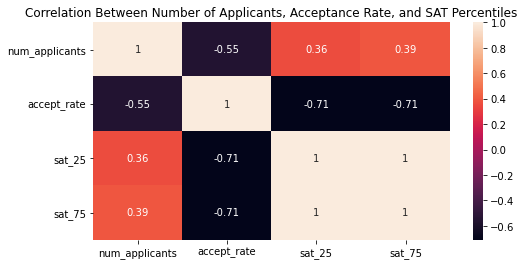

In [44]:
# I got inspiration from this website: https://newbedev.com/how-do-i-add-a-title-to-seaborn-heatmap
plt.figure(figsize = (8,4))
corr = michigan_sat_by_college.corr()
axes = plt.axes()
sns.heatmap(corr, annot=True, ax = axes)
axes.set_title("Correlation Between Number of Applicants, Acceptance Rate, and SAT Percentiles");

The correlation between the 25th and 75th accepted SAT percentiles is 1, which means that the two variables are perfectly coordinated with each other. Both percentile variables have a strong negative correlation with acceptance rate, which is expected since the more competitive colleges look for higher SAT scores. The number of applicants has a decently high negative correlation with acceptance rate, but not much correlation with either of the percentile variables.

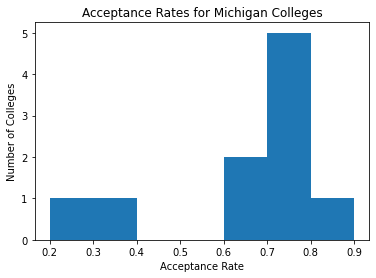

In [45]:
bins_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
plt.hist(michigan_sat_by_college['accept_rate'], bins=bins_list)

plt.title("Acceptance Rates for Michigan Colleges")
plt.xlabel("Acceptance Rate")
plt.ylabel("Number of Colleges");

Most of the colleges have a high acceptance rate, with fully half of them admitting between 70% and 80% of applicants. Despite the small size of the data, it seems to approximate a left-skewing normal distribution. This distribution belies the fact that the average Michigander does not have high enough SAT scores to get into most of these places.

C:\Users\A-RAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


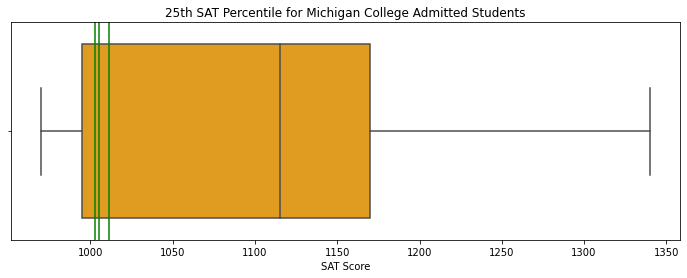

In [46]:
plt.figure(figsize=(12,4))
axes = plt.axes()
sns.boxplot(michigan_sat_by_college['sat_25'], ax = axes, color = 'orange')

plt.title("25th SAT Percentile for Michigan College Admitted Students")
plt.xlabel("SAT Score")

# Vertical lines are added for the 2017, 2018, and 2019 Michigan SAT averages
plt.axvline(x = michigan_sat['2017'], color = 'green');
plt.axvline(x = michigan_sat['2018'], color = 'green');
plt.axvline(x = michigan_sat['2019'], color = 'green');

The green lines show the average SAT scores in Michigan for 2017, 2018, and 2019. This plot is consistent with what was surmised from the data: the average Michigander only barely reaches the first quartile of 25th percentiles.

C:\Users\A-RAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


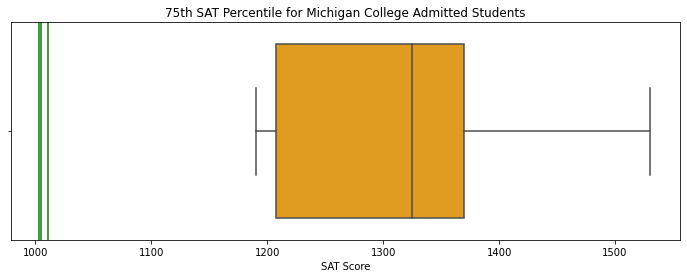

In [47]:
plt.figure(figsize=(12,4))
axes = plt.axes()
sns.boxplot(michigan_sat_by_college['sat_75'], ax = axes, color = 'orange')

plt.title("75th SAT Percentile for Michigan College Admitted Students")
plt.xlabel("SAT Score")

# Vertical lines are added for the 2017, 2018, and 2019 Michigan SAT averages
plt.axvline(x = michigan_sat['2017'], color = 'green');
plt.axvline(x = michigan_sat['2018'], color = 'green');
plt.axvline(x = michigan_sat['2019'], color = 'green');

Like the previous boxplot, the green lines show the average SAT scores in Michigan from 2017 to 2019. They are far to the left of the boxplot, indicating that the average Michigander cannot stand a chance of being in the 75th percentile of admission to any of the Michigan colleges.

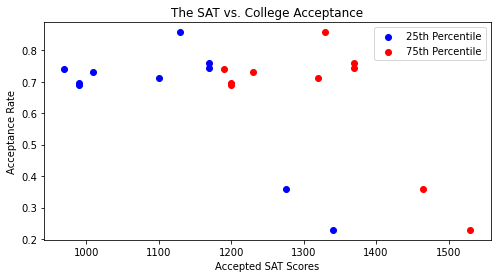

In [48]:
plt.figure(figsize = (8,4))

plt.scatter(x = michigan_sat_by_college['sat_25'],
           y = michigan_sat_by_college['accept_rate'],
           color = 'blue',
           label = '25th Percentile')

plt.scatter(x = michigan_sat_by_college['sat_75'],
           y = michigan_sat_by_college['accept_rate'],
           color = 'red',
           label = '75th Percentile')

plt.legend()

plt.title("The SAT vs. College Acceptance")
plt.xlabel("Accepted SAT Scores")
plt.ylabel("Acceptance Rate");

This scatterplot further confirms the findings from the heatmap that the 25th percentile and the 75th percentile have roughly the same correlation, which appears to be negative, with the acceptance rate.

## Conclusions and Recommendations

You should certainly do better than the average Michigander on the SAT to get into **any** of the ten Michigan colleges. If you perform at the average level from 2017 to 2019, you might barely get into Albion, Central Michigan, or Eastern Michigan and you will not get into the others at all.

As there is a strong negative correlation between acceptance rate and SAT scores, you should try the hardest for the two highly selective colleges, the University of Michigan and Hillsdale College. Try for a perfect score if your first choice is the University of Michigan and at least 1500 if your first choice is Hillsdale so you will not lose much if you fall short. If your first choice is any of the other eight, aim for 1300, even if the admission rate makes you feel more confident about getting in while doing worse.

It is debatable whether you should the SAT at all, given how learning at home, especially without the proper resources, leads to students becoming far behind. But given Michigan's unique situation of requiring SAT scores on transcripts, it is worth the effort to do well because college admissions teams will look at the score.